作者：云朵君  
公众号：数据STUDIO  
代码仓促整理，若有问题，请及时联系云朵君  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [232]:
plt.rcParams['font.family'] = ['Arial Unicode MS']#显示中文,解决图中无法显示中文的问题
plt.rcParams['axes.unicode_minus']=False

In [17]:
import datetime

In [27]:
data = pd.read_csv('Data_notnull.csv',index_col=0)

In [28]:
data.head()

,sampleid,label,d,arrival,consuming_capacity,price_sensitive,ordernum_oneyear,avgprice,ctrip_profits,lasthtlordergap,cityorders,lastpvgap,cr,visitnum_oneyear,h
0,24650,0,2016-05-18,2016-05-20,39.0,62.0,21.0,363.0,3.440,10475.0,1.987,7566.0,1.50,1265.0,17
1,24653,0,2016-05-18,2016-06-08,26.0,8.0,7.0,307.0,1.413,18873.0,0.287,288.0,1.00,21926.0,7
2,24658,0,2016-05-18,2016-05-18,96.0,25.0,33.0,1000.0,32.547,4616.0,1.207,614.0,1.52,2807.0,15
3,24662,0,2016-05-18,2016-06-02,61.0,11.0,4.0,685.0,11.280,44830.0,0.040,7262.0,1.00,5584.0,11
4,24665,1,2016-05-18,2016-05-20,27.0,33.0,7.0,407.0,1.073,5823.0,0.667,216.0,1.38,2328.0,14


In [ ]:
data.['','lastpvgap','avgprice']

In [18]:
def str_date(x):
    out = datetime.datetime.strptime(x,"%Y-%m-%d").date()
    return out

In [29]:
data['delta'] = data.arrival.map(str_date) - data.d.map(str_date)
data['delta'] = data['delta'].dt.days

In [30]:
data.drop(columns=['d','arrival'],inplace=True)

In [31]:
data.head()

,sampleid,label,consuming_capacity,price_sensitive,ordernum_oneyear,avgprice,ctrip_profits,lasthtlordergap,cityorders,lastpvgap,cr,visitnum_oneyear,h,delta
0,24650,0,39.0,62.0,21.0,363.0,3.440,10475.0,1.987,7566.0,1.50,1265.0,17,2
1,24653,0,26.0,8.0,7.0,307.0,1.413,18873.0,0.287,288.0,1.00,21926.0,7,21
2,24658,0,96.0,25.0,33.0,1000.0,32.547,4616.0,1.207,614.0,1.52,2807.0,15,0
3,24662,0,61.0,11.0,4.0,685.0,11.280,44830.0,0.040,7262.0,1.00,5584.0,11,15
4,24665,1,27.0,33.0,7.0,407.0,1.073,5823.0,0.667,216.0,1.38,2328.0,14,2


In [58]:
columns = ['consuming_capacity','price_sensitive','ordernum_oneyear'
                ,'avgprice','ctrip_profits','lasthtlordergap','cityorders'
                ,'lastpvgap','visitnum_oneyear','h','delta']

In [34]:
X = data.loc[:,['consuming_capacity','price_sensitive','ordernum_oneyear'
                ,'avgprice','ctrip_profits','lasthtlordergap','cityorders'
                ,'lastpvgap','visitnum_oneyear','h','delta']]

In [59]:
X_label = data.iloc[:,2:]

In [60]:
Y_label = data.label

In [36]:
y = data.cr

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
clf = RandomForestRegressor()
clf=clf.fit(X,y)

In [38]:
weights = clf.feature_importances_

In [39]:
weights

array([0.03946011, 0.0502546 , 0.07716322, 0.05759515, 0.06905622,
       0.36134694, 0.05181762, 0.0940977 , 0.14865318, 0.03103164,
       0.01952363])

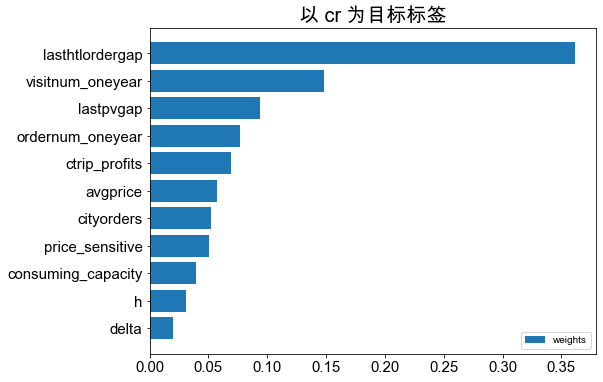

In [235]:
plt.figure(figsize=(8,6))
plt.barh(df_cr.index,df_cr.values[:,0],label='weights')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend()
plt.title('以 cr 为目标标签',fontsize=20);

In [229]:

df_cr = pd.DataFrame(dict(zip(columns,weights)),index=['weights']).T.sort_values(by='weights')


In [54]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
clf_1 = RandomForestClassifier()
clf_1 = clf_1.fit(X_label,Y_label)

In [62]:
weights_label = clf_1.feature_importances_

In [98]:
weights_label

array([0.07186231, 0.07417042, 0.07284098, 0.08944136, 0.0979083 ,
       0.10594284, 0.09071237, 0.09933662, 0.08413622, 0.10264516,
       0.06329112, 0.0477123 ])

In [63]:
weights_label

array([0.07186231, 0.07417042, 0.07284098, 0.08944136, 0.0979083 ,
       0.10594284, 0.09071237, 0.09933662, 0.08413622, 0.10264516,
       0.06329112, 0.0477123 ])

In [99]:
df_label = pd.DataFrame(dict(zip(X_label.columns,weights_label)),index=['weights']).T.sort_values(by='weights')

In [114]:
df_label.values[:,0]

array([0.0477123 , 0.06329112, 0.07186231, 0.07284098, 0.07417042,
       0.08413622, 0.08944136, 0.09071237, 0.0979083 , 0.09933662,
       0.10264516, 0.10594284])

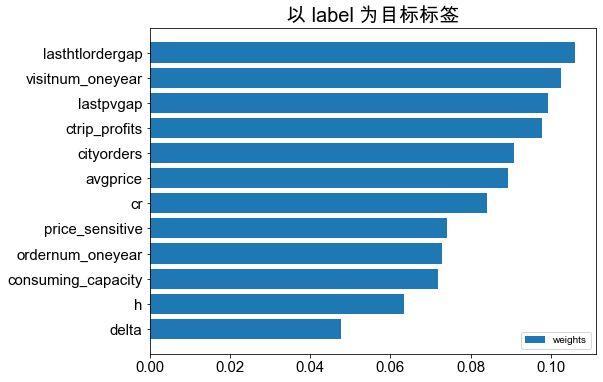

In [238]:
plt.figure(figsize=(8,6))
plt.barh(df_label.index,df_label.values[:,0],label='weights')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend()
plt.title('以 label 为目标标签',fontsize=20);

In [240]:
pd.DataFrame({'R':'lasthtlordergap','F':'ordernum_oneyear','M':'avgprice'},index=['模型'])

,R,F,M
模型,lasthtlordergap,ordernum_oneyear,avgprice


In [82]:
rfm = data.loc[:,['sampleid','ordernum_oneyear','avgprice','lasthtlordergap']].rename(columns={'ordernum_oneyear':'F','avgprice':'M','lasthtlordergap':'R'})

rfm.head()

,sampleid,F,M,R
0,24650,21.0,363.0,10475.0
1,24653,7.0,307.0,18873.0
2,24658,33.0,1000.0,4616.0
3,24662,4.0,685.0,44830.0
4,24665,7.0,407.0,5823.0


In [40]:
clf_rfm  = RandomForestRegressor()
clf_rfm = clf_rfm.fit(rfm[["F",'M','R']],y)

In [84]:
weights_rfm = clf_rfm.feature_importances_

In [85]:
weights_rfm

array([0.13384642, 0.24777751, 0.61837607])

In [119]:
df_rfm = pd.DataFrame(dict(zip(rfm.columns[1:],weights_rfm)),index=['weights']).T.sort_values(by='weights')

/Users/jim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


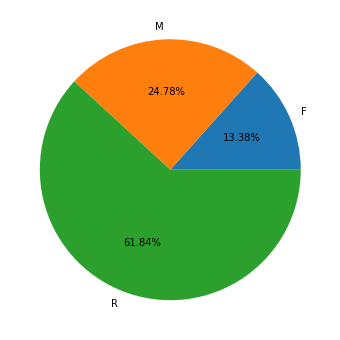

In [135]:
plt.figure(figsize=(6,6))
plt.pie(df_rfm,
    explode=None,
    labels=['F','M','R'],
    autopct='%.2f%%');

In [91]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
sampleid,297040.0,629554.071354,414645.230501,24650.0,314026.0,601044.0,887448.75,2238403.0
F,297040.0,13.552054,18.497338,1.0,3.0,7.0,16.00,711.0
M,297040.0,438.612857,292.952034,9.0,246.0,368.0,544.00,6383.0
R,297040.0,91178.544997,111879.749452,0.0,14926.0,44761.0,122313.00,527026.0


In [92]:
f_bins = [-1,3,16,711]
m_bins = [8,246,544,6383]
r_bins = [-1,14926,22313.00,527026.0]

In [138]:
rfm['R_score'] = pd.cut(rfm['R'],r_bins,labels=[i for i in range(len(r_bins)-1,0,-1)])
rfm['F_score'] = pd.cut(rfm['F'],f_bins,labels=[i+1 for i in range(len(r_bins)-1)])
rfm['M_score'] = pd.cut(rfm['M'],m_bins,labels=[i+1 for i in range(len(r_bins)-1)])

In [139]:
rfm

,sampleid,F,M,R,R_score,F_score,M_score
0,24650,21.0,363.0,10475.0,3,3,2
1,24653,7.0,307.0,18873.0,2,2,2
2,24658,33.0,1000.0,4616.0,3,3,3
3,24662,4.0,685.0,44830.0,1,2,3
4,24665,7.0,407.0,5823.0,3,2,2
...,...,...,...,...,...,...,...
297035,2238388,2.0,226.0,170680.0,1,1,1
297036,2238389,4.0,461.0,528.0,3,2,2
297037,2238396,5.0,193.0,63673.0,1,2,1
297038,2238397,1.0,258.0,125643.0,1,1,2


In [140]:
rfm = rfm.apply(np.int32)

In [141]:
rfm['rfm_score'] = rfm['F']*weights_rfm[0] + rfm['M']*weights_rfm[1] +rfm['R']*weights_rfm[2]

In [148]:
rfm['R_score'] = rfm['R_score'].astype(np.str)
rfm['F_score'] = rfm['F_score'].astype(np.str)
rfm['M_score'] = rfm['M_score'].astype(np.str)
rfm['rfm_group'] = rfm['R_score'].str.cat(rfm['F_score']).str.cat(rfm['M_score'])

In [149]:
rfm

,sampleid,F,M,R,R_score,F_score,M_score,rfm_score,rfm_group
0,24650,21,363,10475,3,3,2,6570.243365,332
1,24653,7,307,18873,2,2,2,11747.616228,222
2,24658,33,1000,4616,3,3,3,3106.618387,333
3,24662,4,685,44830,1,2,3,27892.062289,123
4,24665,7,407,5823,3,2,2,3702.586238,322
...,...,...,...,...,...,...,...,...,...
297035,2238388,2,226,170680,1,1,1,105600.693390,111
297036,2238389,4,461,528,3,2,2,441.263382,322
297037,2238396,5,193,63673,1,2,1,39422.349928,121
297038,2238397,1,258,125643,1,1,2,77758.685266,112


In [152]:
All = pd.merge(data.loc[:,['label','sampleid']],rfm,how='left',on='sampleid')
All

,label,sampleid,F,M,R,R_score,F_score,M_score,rfm_score,rfm_group
0,0,24650,21,363,10475,3,3,2,6570.243365,332
1,0,24653,7,307,18873,2,2,2,11747.616228,222
2,0,24658,33,1000,4616,3,3,3,3106.618387,333
3,0,24662,4,685,44830,1,2,3,27892.062289,123
4,1,24665,7,407,5823,3,2,2,3702.586238,322
...,...,...,...,...,...,...,...,...,...,...
297035,0,2238388,2,226,170680,1,1,1,105600.693390,111
297036,1,2238389,4,461,528,3,2,2,441.263382,322
297037,0,2238396,5,193,63673,1,2,1,39422.349928,121
297038,0,2238397,1,258,125643,1,1,2,77758.685266,112


In [189]:
data_display = All.groupby(['rfm_group','label'],as_index=False)['sampleid'].count()

In [210]:
data_score = All.groupby(['rfm_group','label'],as_index=False)['rfm_score'].sum()

In [211]:
data_display.columns = ['rfm_group','label','number']
data_display['rfm_group'] = data_display['rfm_group'].astype(np.int32)
data_display.head()

,rfm_group,label,number
0,111,0,17543
1,111,1,5460
2,112,0,25258
3,112,1,7197
4,113,0,13951


In [212]:
data_score.columns = ['rfm_group','label','sum']
data_score['rfm_group'] = data_score['rfm_group'].astype(np.int32)
data_score.head()

,rfm_group,label,sum
0,111,0,1.894078e+09
1,111,1,5.335700e+08
2,112,0,2.964654e+09
3,112,1,7.884702e+08
4,113,0,1.695004e+09


In [222]:
data_score.to_excel('data_score.xlsx')

In [223]:
data_score_1=pd.read_excel('data_score.xlsx',index_col=0) 

number = (number_0 - number_1)*log(sum(rfm_score)_0/sum(rfm_score)_1)

In [177]:
# rfm_group = data_display.RFM_group.drop_duplicates()

# rfm_group = rfm_group.reset_index()

# rfm_group['label']=-1

# rfm_group.drop('index',axis=1,inplace=True)

In [179]:
# data_display.to_excel('data_display.xlsx')

In [180]:
# data_display_1 = pd.read_excel('data_display.xlsx',index_col=0)

In [195]:
data_display_1.rename(columns={'RFM_group':'rfm_group'},inplace=True)

In [224]:
data_score_1['number'] = data_score_1['number'].astype(np.int32)

In [225]:
data_score_1

,RFM_group,label,number
0,111,0,17543
1,111,1,5460
2,111,-1,6648
3,112,0,25258
4,112,1,7197
...,...,...,...
76,332,1,9646
77,332,-1,1
78,333,0,4921
79,333,1,4095


In [146]:
from pyecharts import Bar3D

In [157]:
# 显示图形
bar3d = Bar3D("", width=900, height=600)
range_color = ['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
               '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']
bar3d.add(
    "rfm分组结果",
    "",
    "",
    [d.tolist() for d in data_display.values],
    is_visualmap=True,
    visual_range=[0, data_display['number'].max()],
    visual_range_color=range_color,
    grid3d_width=200,
    grid3d_height=80,
    grid3d_depth=80
)
bar3d

In [226]:
# 显示图形
bar3d = Bar3D("", width=900, height=600)
range_color = ['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
               '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']
bar3d.add(
    "rfm分组结果",
    "",
    "",
    [d.tolist() for d in data_score_1.values],
    is_visualmap=True,
    visual_range=[data_score_1['number'].min(), data_score_1['number'].max()],
    visual_range_color=range_color,
    grid3d_width=200,
    grid3d_height=80,
    grid3d_depth=80
)
bar3d